In [590]:
################################################################################
# Author 1:      Lukas Umfahrer
# MatNr 1:       12337160
# Author 2:      Firstname Lastname
# MatNr 2:       01234567
# Author 3:      Firstname Lastname
# MatNr 3:       01234567
# File:          assignment2.ipynb
# Description: ... short description of the file ...
# Comments:    ... comments for the tutors ...
#              ... can be multiline ...
################################################################################


<center>
    <h1>Assignment 2</h1>
</center>

#### Imports

In [591]:
import pandas as pa
import matplotlib.pyplot as plt
import plotly as pl
import numpy as np
import pycountry as py
import pycountry_convert as pyco

## Part 1: Data Analysis & Visualization Code - Required Plots

### Line plots: Visualize data over time (4P)

In [592]:
data = pa.read_csv("OECD.ELS.HD,DSD_HEALTH_LVNG@DF_HEALTH_LVNG,+all.csv", delimiter = ",")   # Daten einlesen

data

data_de = data[data["REF_AREA"]=="DEU"]    # Nur Daten aus dem Land DE verwenden

data_de

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Unnamed: 5,FREQ,Unnamed: 7,MEASURE,Unnamed: 9,...,TIME_PERIOD,Unnamed: 19,OBS_VALUE,Unnamed: 21,OBS_STATUS,Unnamed: 23,UNIT_MULT,Unnamed: 25,DECIMALS,Unnamed: 27
143,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,DEU,NaN,A,NaN,SP_DS,NaN,...,1978,NaN,28.5,NaN,A,NaN,0,NaN,NaN,NaN
144,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,DEU,NaN,A,NaN,SP_DS,NaN,...,1989,NaN,25.1,NaN,A,NaN,0,NaN,NaN,NaN
145,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,DEU,NaN,A,NaN,SP_DS,NaN,...,1992,NaN,24.8,NaN,B,NaN,0,NaN,NaN,NaN
146,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,DEU,NaN,A,NaN,SP_DS,NaN,...,1995,NaN,24.3,NaN,A,NaN,0,NaN,NaN,NaN
147,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,DEU,NaN,A,NaN,SP_DS,NaN,...,1999,NaN,24.7,NaN,A,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31873,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,DEU,NaN,A,NaN,SP_OVRGHT_OBS,NaN,...,2013,NaN,52.4,NaN,A,NaN,0,NaN,NaN,NaN
31874,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,DEU,NaN,A,NaN,SP_OVRGHT_OBS,NaN,...,2017,NaN,52.7,NaN,A,NaN,0,NaN,NaN,NaN
31875,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,DEU,NaN,A,NaN,SP_OVRGHT_OBS,NaN,...,2021,NaN,52.7,NaN,A,NaN,0,NaN,NaN,NaN
31876,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,DEU,NaN,A,NaN,SP_OVRGHT_OBS,NaN,...,1998,NaN,66.7,NaN,A,NaN,0,NaN,NaN,NaN


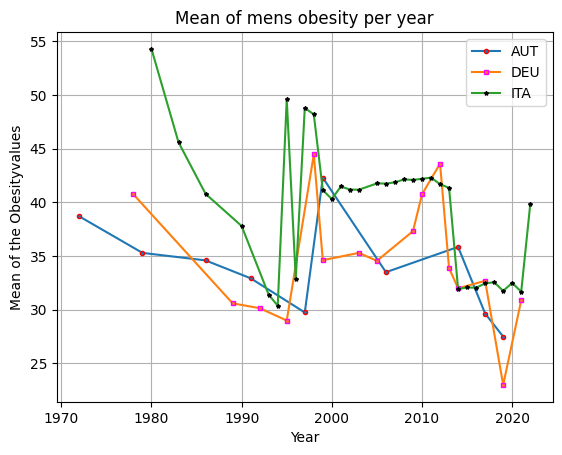

In [ ]:
figure, axis = plt.subplots()

data_aut = data[data["REF_AREA"]=="AUT"]    # Nur Daten aus dem Land AUT verwenden
data_usa = data[data["REF_AREA"]=="USA"]    # Nur Daten aus dem Land USA verwenden
data_deu = data[data["REF_AREA"]=="DEU"]    # Nur Daten aus dem Land DEU verwenden
data_ita = data[data["REF_AREA"]=="ITA"]    # Nur Daten aus dem Land ITA verwenden

data_aut_men = data_aut[data_aut["SEX"]=="M"]   # Daten von allen aus AUT Männern damit der Graph am Ende übersichtlicher ist
data_usa_men = data_usa[data_usa["SEX"]=="M"]   # Daten von allen aus USA Männern damit der Graph am Ende übersichtlicher ist
data_deu_men = data_deu[data_deu["SEX"]=="M"]   # Daten von allen aus DEU Männern damit der Graph am Ende übersichtlicher ist
data_ita_men = data_ita[data_ita["SEX"]=="M"]   # Daten von allen aus ITA Männern damit der Graph am Ende übersichtlicher ist

data_aut_men_mean = data_aut_men.groupby("TIME_PERIOD")["OBS_VALUE"].mean()     # Durchschnitt der Männer aus AUT aus einem Jahr berechnen
data_usa_men_mean = data_usa_men.groupby("TIME_PERIOD")["OBS_VALUE"].mean()     # Durchschnitt der Männer aus USA aus einem Jahr berechnen
data_deu_men_mean = data_deu_men.groupby("TIME_PERIOD")["OBS_VALUE"].mean()     # Durchschnitt der Männer aus DEU aus einem Jahr berechnen
data_ita_men_mean = data_ita_men.groupby("TIME_PERIOD")["OBS_VALUE"].mean()     # Durchschnitt der Männer aus ITA aus einem Jahr berechnen

# AUT Graph
ys_aut= data_aut_men_mean.values   # Werte
xs_aut = data_aut_men_mean.index    # Jahre

axis.plot(xs_aut, ys_aut,
          marker="o",
          markersize="3",
          markeredgecolor="red",
          label="AUT")

# USA Graph
#ys_usa = data_usa_men_mean.values   # Werte
#xs_usa = data_usa_men_mean.index    #Jahre

#axis.plot(xs_usa, ys_usa,
 #         marker="^",
  #        markersize="3",
   #       markeredgecolor="green",
    #      label="USA")

# DEU Graph
ys_deu = data_deu_men_mean.values   # Werte
xs_deu = data_deu_men_mean.index    #Jahre

axis.plot(xs_deu, ys_deu,
          marker="s",
          markersize="3",
          markeredgecolor="magenta",
          label="DEU")

# ITA Graph
ys_ita= data_ita_men_mean.values   # Werte
xs_ita = data_ita_men_mean.index    # Jahre

axis.plot(xs_ita, ys_ita,
          marker="*",
          markersize="3",
          markeredgecolor="black",
          label="ITA")


axis.set_xlabel("Year")
axis.set_ylabel("Mean of the Obesityvalues")
axis.legend()
plt.title("Mean of mens obesity per year")
plt.grid(True)


### Bar charts: Compare data from different countries (4P)

### Scatter plots: Visualize the relationship between different variables (7P)